# Step 2 - Test d'ipotesi
Vogliamo testare l'ipotesi di solo fondo con quella di Segnale + Fondo ed entrambe saranno testate effettuando la correzione dell'aggiunta di 7.905 eventi, come osservato debba accadere nel notebook *04_cut_revert.ipynb*

---
---
### Primo approccio
* La notra test statistic è il numero di eventi attesi
* Chiamo le ipotesi di segnale+fondo e solo fondo rispettivamente Hs e Hb
    * L'ipotesi di segnale + fondo corrisponde ad una poissoniana centrata a $\nu = 5.2 + 7.9 = 13.1$ 
    * L'ipotesi di solo fondo corrisponde ad una poissoniana centrata a $\nu = 2.8+7.9 = 10.7$
* Cerco un valore per il cut della test statistic tale da permettermi di avere una signal efficiency del 95%, ossia un significance level del 5%
    + A questo sarà quindi legato un certo valore che è la probabilità di star sbagliando a scegliere tale ipotesi, ossia l'integrale della distribuzione di BG nella zona del taglio decisa come segnale
    
---
### Secondo approccio
* La notra test statistic è il numero di eventi attesi
* Chiamo le ipotesi di segnale+fondo e solo fondo rispettivamente Hs e Hb
    * L'ipotesi di segnale + fondo corrisponde ad una poissoniana centrata a $\nu = 5.2 + 7.9 = 13.1$ 
    * L'ipotesi di solo fondo corrisponde ad una poissoniana centrata a $\nu = 2.8+7.9 = 10.7$
* Il cut viene effettuato esattamente dove si trovano i miei dati, così da poter dire che per $t\geq t_{cut}$ ho un certo significance level del mio segnale
    + A questo sarà quindi legato un certo valore che è la probabilità di star sbagliando a scegliere tale ipotesi, ossia l'integrale della distribuzione di BG nella zona del taglio decisa come segnale

In [1]:
import ROOT
import particle as pt
import funx as fx
import numpy as np

Welcome to JupyROOT 6.26/04


### Primo approccio

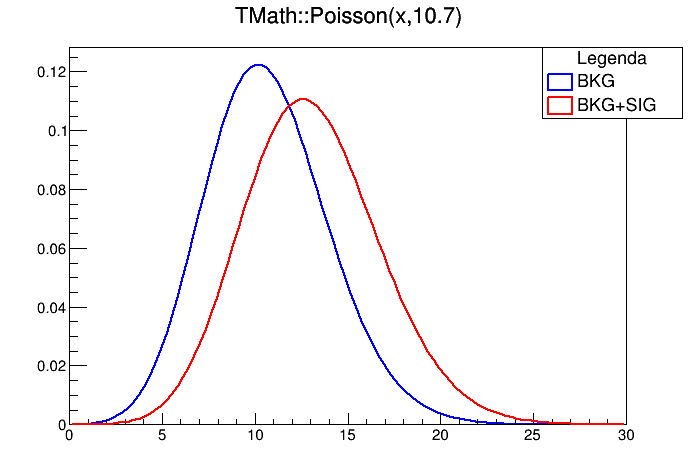

In [12]:
Hb1 = ROOT.TF1("Backgroun hypotesis" , "TMath::Poisson(x,10.7)",0, 30)  #Solo GB
Hs1 = ROOT.TF1("Signal hypotesis" , "TMath::Poisson(x,13.1)",0, 30)     #BG+Signal

c=ROOT.TCanvas()
c.Draw()
Hb1.SetLineColor(ROOT.kBlue)
Hb1.Draw()
Hs1.Draw("SAME")

leg = ROOT.TLegend(0.98,0.9,0.78,0.75) #x1,y1 (coordinate punto alto dx), x2,y2 (coordinate punto basso sx)
leg.SetHeader("Legenda", "C")                         
leg.AddEntry(Hb1, "BKG","f")            
leg.AddEntry(Hs1, "BKG+SIG","f")
leg.Draw()

In [21]:
alpha = Hs1.Integral(0,7.5)  #Con 7.5 ottengo significance del 5%
#print("Significance: ", alpha)
efficiency = Hs1.Integral(7.5,45)
print("Significance: ", alpha, "\nEfficiency: ",efficiency)

rej_pow = Hb1.Integral(0,7.5)
misID = Hb1.Integral(7.5,45)
print("\nMisidentification Probability: ", misID, "\nRejection Power: ",rej_pow)

Significance:  0.0519964576829405 
Efficiency:  0.948003008139

Misidentification Probability:  0.8353303542072189 
Rejection Power:  0.16466350395868407


### Approccio 2

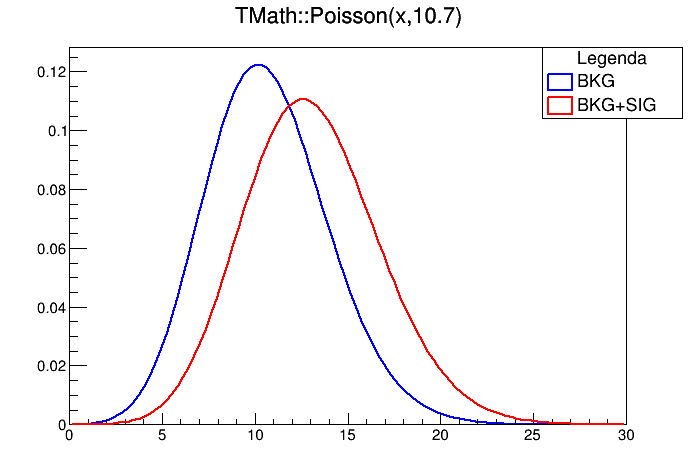

In [3]:
Hb = ROOT.TF1("Backgroun hypotesis" , "TMath::Poisson(x,10.7)",0, 30)  #Solo GB
Hs = ROOT.TF1("Signal hypotesis" , "TMath::Poisson(x,13.1)",0, 30)     #BG+Signal

c=ROOT.TCanvas()
c.Draw()
Hb.SetLineColor(ROOT.kBlue)
Hb.Draw()
Hs.Draw("SAME")

leg = ROOT.TLegend(0.98,0.9,0.78,0.75) #x1,y1 (coordinate punto alto dx), x2,y2 (coordinate punto basso sx)
leg.SetHeader("Legenda", "C")                         
leg.AddEntry(Hb, "BKG","f")            
leg.AddEntry(Hs, "BKG+SIG","f")
leg.Draw()

In [10]:
alpha = Hs.Integral(0,13)
efficiency = Hs.Integral(13,45)
print("Significance: ", alpha, "\nEfficiency: ",efficiency)

rej_pow = Hb.Integral(0,13)  
misID = Hb.Integral(13,45)   #beta
print("\nMisidentification Probability: ", misID, "\nRejection Power: ",rej_pow)

Significance:  0.5073820008683971 
Efficiency:  0.4926174649535439

Misidentification Probability:  0.23364507846633573 
Rejection Power:  0.7663487796995672


## Come esporre il discorso
Il primo tentativo, di impostare a priori una significance che ci piacesse, ha dato un risultato sì decente del 95% di efficiency, ma rende molto alta la probabilità di misID a causa del fatto che ho dei conteggi e questi sono comunque troppo ravvicinati. 

Quindi come secondo test di ipotesi si è provato invece a decidere come cut della test statistic 13, ossia il valore effettivamente misurato nel dataset di interesse. Ciò ci ha permesso di ottenere sì una riduzione vistosa dell'efficiencì che praticamente arriva ad essere il 50%, abbassando la significance del nostro test, ma anche una riduzione molto forte della misID probability che arriva al 23%

---
Qui sotto provo ora a fare un calcolo della significatività statistica, ossia che numero di deviazioni standard ci stiamo allontanando dall'ipotesi di solo fondo. Controllare gli appunti per la spiegazione, ma in teorai dovrebbe essere $$Z=\frac{S}{\sqrt{B}}$$

In [23]:
z=2.4/(np.sqrt(2.8))
print(z)

1.4342743312012722
